## AI-based thematic analysis

Authors: S. Shailja and Ayush Pandey

Last Updated: April 27, 2025

### Install all libraries and import

In [5]:
# If not already installed run 
# the following on a terminal in your environment:
 
# !pip install -r requirements.txt

from sentence_transformers import SentenceTransformer
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
from collections import defaultdict
import pandas as pd
import numpy as np
import random

/home/codespace/.local/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


### Load data 

Here, we load the human thematic analysis (clustered categories; output ground truth) and all the words/phrases from the original, un-clustered data (input data).

In [6]:
# All phrases from categories (input data that needs to be clustered)
words_list = ['Accomplished','Proud','Success','Insecurity','Fear',
              'Feelings of Growth','Exciting','Inspirational','Scary',
              'Motivational','Stressed','Worked with Others Outside Group',
              'Getting Help from Others','Experience with Team During SRA',
              'Enjoyed Collaborating','Enjoyed Meeting People with Similar Interests',
              'Bonding with Colleagues','Collaborative Environment','Hands on Experience',
              'Interactive Experience','Perspective on College',
              'Comparing High School to College','Perspective on Deadlines',
              'Perception of Peers','Competitive Environment for College Apps',
              'Participants Describing the Experience','Figuring Things Out On Your Own',
              'Achieving Accuracy','Solving New Problems','Finishing a Polished Project',
              'Finding New Solutions','Increased Confidence','Lowered Confidence',
              'Learning From Others','Development of Growth Mindset','Developed Work Ethic',
              'Developed Discipline','Self Reliance','Developed Perseverance','Time Management',
              'Organization','Academic Rigor','Discover Passions','Computer Programming',
              'Social Life','Taking Initiative','Find and Join Academic Clubs',
              'Assigning Work/Tasks','Stay Organized and Avoid Procrastinating',
              'Unstructured Learning','Attempting to Solve Before Getting Help',
              'Structured Learning','Find Solutions Using the Internet',
              'Learning From Diverse Resources','Taking Breaks','Asking for Help',
              'Collaborating','Taking Courses','Publishing Research Paper',
              'Programming complex algorithms','Working with New Programs','Debugging',
              'Building Programming Skills','Learning Course Material','Rigorousness of Program',
              'Enhancing Accuracy of Model','Finding Good Data','Short Timeframe for Project Completion',
              'Evaluating Research Correctness','Idea for What Project to Do','Waking Up Early',
              'Gaining Intuition About a Concept','Doing Outside Research','Adjusting to New Environment',
              'Time Management','Learning to find resources','Effective organization','Project Management',
              'Problem Solving Skills','Critical Thinking Skills','Organizing Collaborative Projects',
              'Increased Focus on Self Led Projects','Learning How to Build a Mathematical model',
              'Skills for Computer Vision Development','Learned How to Build a Neural Network Model',
              'Learned About Research Process','Learning How Code','Learning About Machine Learning',
              'Discovering Passions','Used Knowledge from Program Later on in School',
              'Participant Joining Clubs','Achievement','Partcipating in Other Research Projects',
              'Participant Teaching Others','Planned Major and Choice of Career'
            ]
# Ground truth human labeled clusters for themes T1, T2, T3, and T4, in that order in different lists.
clusters_gt = [
                ['Accomplished','Proud','Success','Insecurity','Fear','Feelings of Growth',
                'Exciting','Inspirational','Scary','Motivational','Stressed',
                'Worked with Others Outside Group','Getting Help from Others',
                'Experience with Team During SRA','Enjoyed Collaborating',
                'Enjoyed Meeting People with Similar Interests','Bonding with Colleagues',
                'Collaborative Environment','Hands on Experience','Interactive Experience',
                'Perspective on College','Comparing High School to College','Perspective on Deadlines',
                'Perception of Peers','Competitive Environment for College Apps',
                'Participants Describing the Experience'],
                ['Figuring Things Out On Your Own','Achieving Accuracy','Solving New Problems',
                 'Finishing a Polished Project','Finding New Solutions','Increased Confidence',
                 'Lowered Confidence','Learning From Others','Development of Growth Mindset',
                 'Developed Work Ethic','Developed Discipline','Self Reliance'],
                ['Developed Perseverance','Time Management','Organization',
                 'Academic Rigor','Discover Passions','Computer Programming','Social Life',
                 'Taking Initiative','Find and Join Academic Clubs','Assigning Work/Tasks',
                 'Stay Organized and Avoid Procrastinating','Unstructured Learning',
                 'Attempting to Solve Before Getting Help','Structured Learning',
                 'Find Solutions Using the Internet','Learning From Diverse Resources',
                 'Taking Breaks','Asking for Help','Collaborating','Taking Courses',
                 'Publishing Research Paper','Programming complex algorithms','Working with New Programs',
                 'Debugging','Building Programming Skills','Learning Course Material',
                 'Rigorousness of Program','Enhancing Accuracy of Model','Finding Good Data',
                 'Short Timeframe for Project Completion','Evaluating Research Correctness',
                 'Idea for What Project to Do','Waking Up Early','Gaining Intuition About a Concept',
                 'Doing Outside Research','Adjusting to New Environment','Time Management',
                 'Learning to find resources','Effective organization','Project Management',
                 'Problem Solving Skills','Critical Thinking Skills','Organizing Collaborative Projects',
                 'Increased Focus on Self Led Projects','Learning How to Build a Mathematical model',
                 'Skills for Computer Vision Development','Learned How to Build a Neural Network Model',
                 'Learned About Research Process','Learning How Code','Learning About Machine Learning'],
                ['Discovering Passions','Used Knowledge from Program Later on in School',
                 'Participant Joining Clubs','Achievement','Partcipating in Other Research Projects',
                 'Participant Teaching Others','Planned Major and Choice of Career']
            ]


### Accuracy metric

In [7]:
# Define the accuracy metric of the clustering
def accuracy(cluster, ground_truth):
    count = 0
    for word in cluster:
        if word in ground_truth:
            count += 1
    return count/len(cluster)

### AI-based clustering

Theme 2: Self Efficacy: Debugging, Increased Focus on Self Led Projects, Adjusting to New Environment, Development of Growth Mindset, Developed Work Ethic, Waking Up Early, Finding New Solutions, Stressed, Evaluating Research Correctness, Critical Thinking Skills, Perspective on Deadlines, Developed Perseverance, Learned About Research Process, Taking Breaks, Time Management, Stay Organized and Avoid Procrastinating, Finishing a Polished Project, Short Timeframe for Project Completion, Project Management, Find Solutions Using the Internet, Figuring Things Out On Your Own, Solving New Problems, Time Management, Problem Solving Skills, Self Reliance, Developed Discipline, Academic Rigor, Attempting to Solve Before Getting Help, Assigning Work/Tasks, Taking Initiative
Theme 1: Social and Emotional Learning : Insecurity, Scary, Achievement, Increased Confidence, Exciting, Motivational, Inspirational, Proud, Feelings of Growth, Success, Accomplished, Fear, Lowered Confidence
Theme 4: Progra

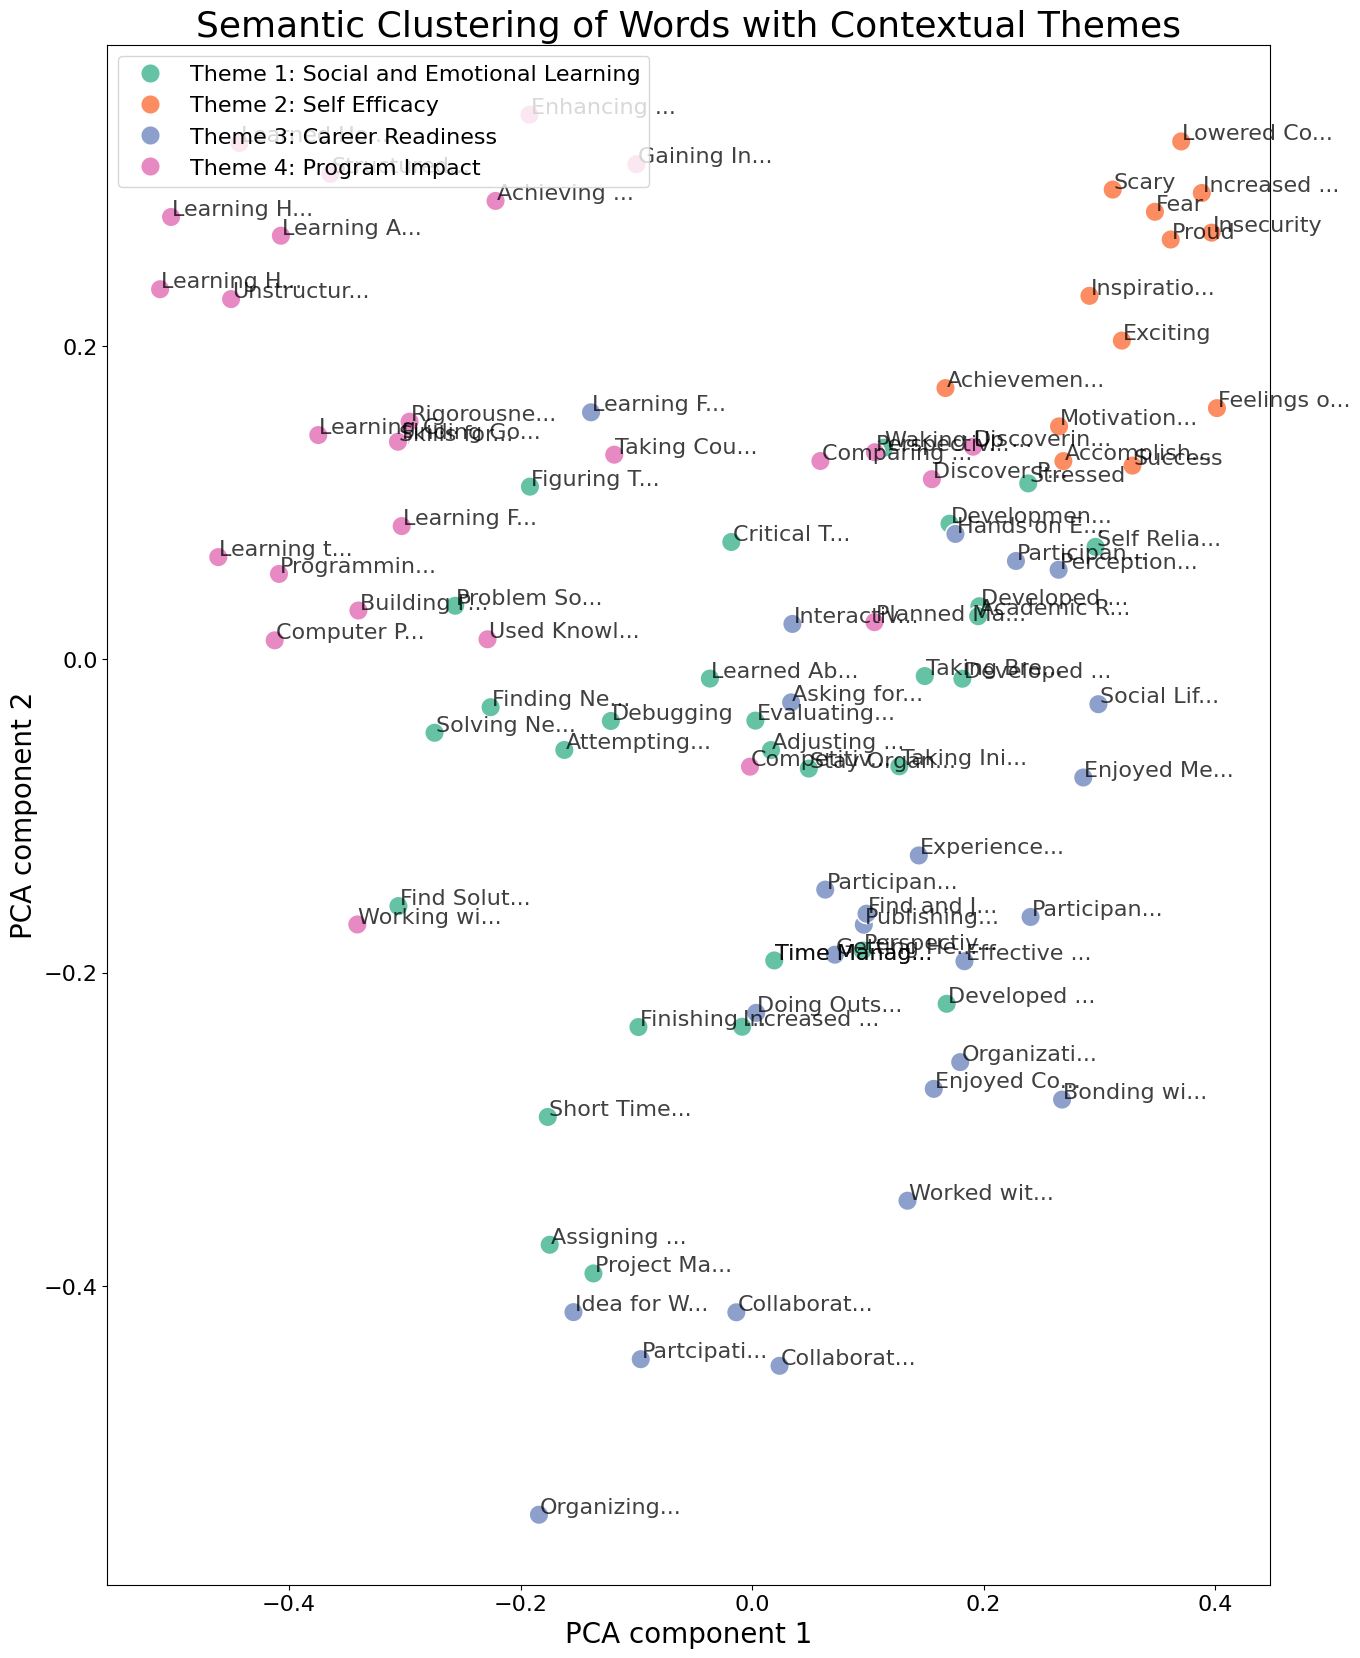

In [8]:
# Define seed words for each theme
theme_seeds = {
    'Theme 1: Social and Emotional Learning ': ['Exciting','Inspirational','Scary'],
    'Theme 2: Self Efficacy': ['Solving New Problems',
                               'Finishing a Polished Project', 'Self Reliance'],
    'Theme 3: Career Readiness': ['Academic Rigor','Discover Passions',
                                  'Computer Programming'],
    'Theme 4: Program Impact': ['Participant Joining Clubs','Achievement',
                                'Partcipating in Other Research Projects',
                                'Participant Teaching Others']
}

np.random.shuffle(words_list)
model = SentenceTransformer('all-MiniLM-L6-v2')
word_embeddings = model.encode(words_list)

# Compute theme centers based on seed words
theme_centers = []
theme_labels = []

for theme, seeds in theme_seeds.items():
    seed_embeddings = model.encode(seeds)
    center = np.mean(seed_embeddings, axis=0)
    theme_centers.append(center)
    theme_labels.append(theme)

theme_centers = np.array(theme_centers)

# Initialize and fit k-means with predefined centers
num_clusters = len(theme_seeds)
kmeans = KMeans(n_clusters=num_clusters, init=theme_centers, n_init=1, random_state=42)
kmeans.fit(word_embeddings)
clusters = kmeans.labels_

# Organize words by cluster
clustered_words = defaultdict(list)
for word, cluster in zip(words_list, clusters):
    theme = theme_labels[cluster]
    clustered_words[theme].append(word)

# Print the clusters
for theme, cluster_words in clustered_words.items():
    print(f"{theme}: {', '.join(cluster_words)}")

# Visualize the clusters
pca = PCA(n_components=2)
reduced_embeddings = pca.fit_transform(word_embeddings)

trimmed_word = []
for word in words_list:
    print(word, len(word))
    if len(word) > 10:
        trimmed_word.append(word[:10]+"...")
    else:
        trimmed_word.append(word)

df = pd.DataFrame({
    'Word': trimmed_word,
    'X': reduced_embeddings[:, 0],
    'Y': reduced_embeddings[:, 1],
    'Theme': [theme_labels[cluster] for cluster in clusters]
})

# plt.rcParams['font.family'] = 'Times New Roman' # comment in to adjust font
plt.figure(figsize=(15, 20))
sns.scatterplot(data=df, x='X', y='Y', hue='Theme', palette='Set2', s=200)

for idx, row in df.iterrows():
    plt.text(row['X'] + 0.001, row['Y'] + 0.001, row['Word'], fontsize=16, alpha=0.75)

plt.title('Semantic Clustering of Words with Contextual Themes', fontsize=26)
plt.xlabel('PCA component 1', fontsize=20)
plt.ylabel('PCA component 2', fontsize=20)
plt.tick_params(labelsize=16)
# plt.legend(title='Theme', title_fontsize='20', fontsize='20')
legend = plt.legend(fontsize='16')  
legend.get_texts()[0].set_text('Theme 1: Social and Emotional Learning')
legend.get_texts()[1].set_text('Theme 2: Self Efficacy')
legend.get_texts()[2].set_text('Theme 3: Career Readiness')
legend.get_texts()[3].set_text('Theme 4: Program Impact')
legend.set_loc('upper left')
plt.show()

### Compute accuracy of clustering

In [10]:
#print length of each clusters
for theme, cluster_words in clustered_words.items():
    print(f"{theme}: {len(cluster_words)}")
    for k in [0,1,2,3]:
        print('Accuracy:', np.round(accuracy(clustered_words[theme], clusters_gt[k]),2))
#create latex code for table of accuracy
#print first row in latex
print("Theme & Cluster Size & Accuracy wrt manual theme 1 & Accuracy wrt"
      "manual theme 2 & Accuracy wrt manual theme 3 & Accuracy wrt manual theme 4 \\\\")
for theme, cluster_words in clustered_words.items():
    # break this down
    num_words = len(cluster_words)
    acc_0 = np.round(accuracy(clustered_words[theme], clusters_gt[0]), 2)
    acc_1 = np.round(accuracy(clustered_words[theme], clusters_gt[1]), 2)
    acc_2 = np.round(accuracy(clustered_words[theme], clusters_gt[2]), 2)
    acc_3 = np.round(accuracy(clustered_words[theme], clusters_gt[3]), 2)
    print(f"{theme} & {num_words} & {acc_0} & {acc_1} & {acc_2} & {acc_3} \\\\")


Theme 2: Self Efficacy: 30
Accuracy: 0.07
Accuracy: 0.27
Accuracy: 0.67
Accuracy: 0.0
Theme 1: Social and Emotional Learning : 13
Accuracy: 0.77
Accuracy: 0.15
Accuracy: 0.0
Accuracy: 0.08
Theme 4: Program Impact: 25
Accuracy: 0.44
Accuracy: 0.04
Accuracy: 0.4
Accuracy: 0.12
Theme 3: Career Readiness: 27
Accuracy: 0.11
Accuracy: 0.04
Accuracy: 0.74
Accuracy: 0.11
Theme & Cluster Size & Accuracy wrt manual theme 1 & Accuracy wrtmanual theme 2 & Accuracy wrt manual theme 3 & Accuracy wrt manual theme 4 \\
Theme 2: Self Efficacy & 30 & 0.07 & 0.27 & 0.67 & 0.0 \\
Theme 1: Social and Emotional Learning  & 13 & 0.77 & 0.15 & 0.0 & 0.08 \\
Theme 4: Program Impact & 25 & 0.44 & 0.04 & 0.4 & 0.12 \\
Theme 3: Career Readiness & 27 & 0.11 & 0.04 & 0.74 & 0.11 \\


### Visualize the accuracy with Venn diagrams

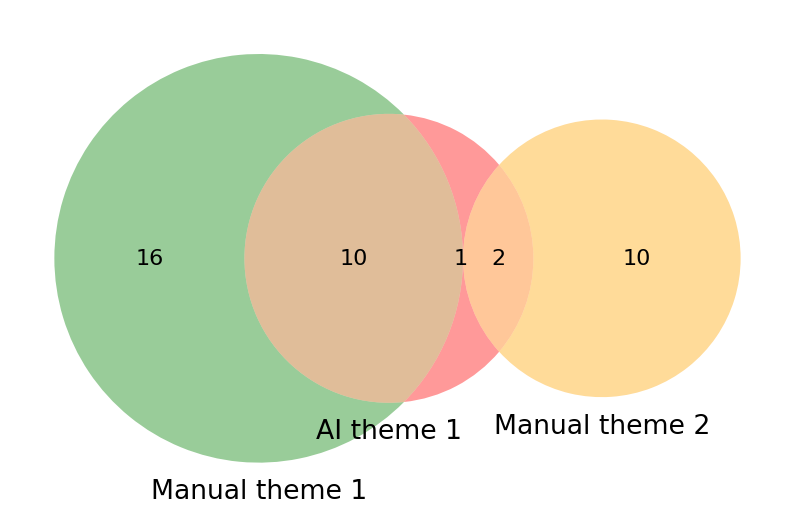

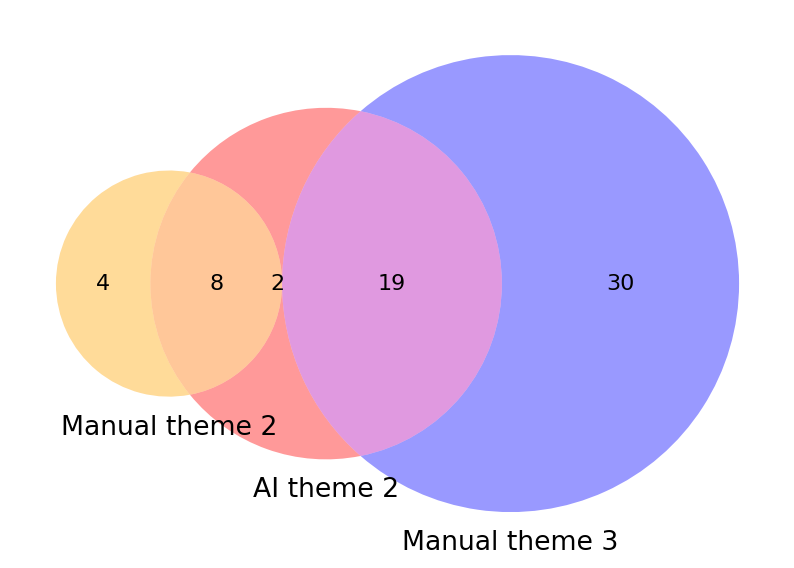

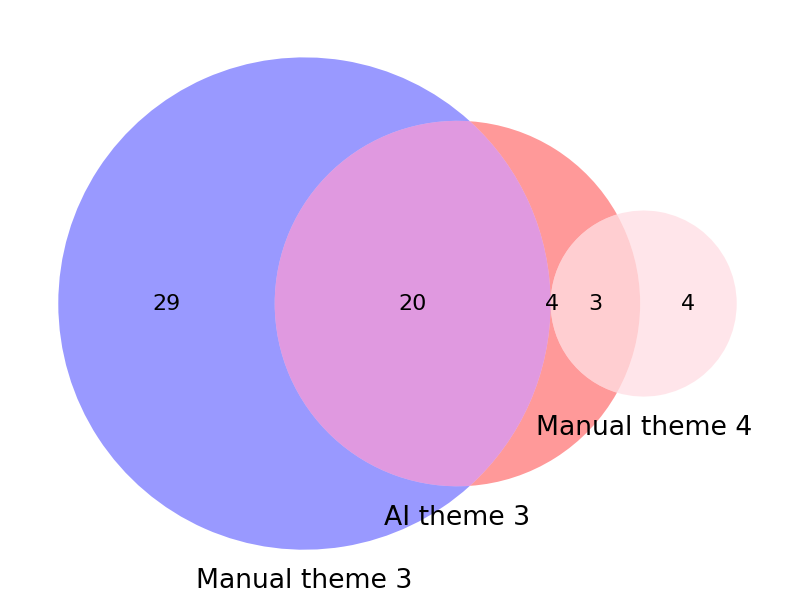

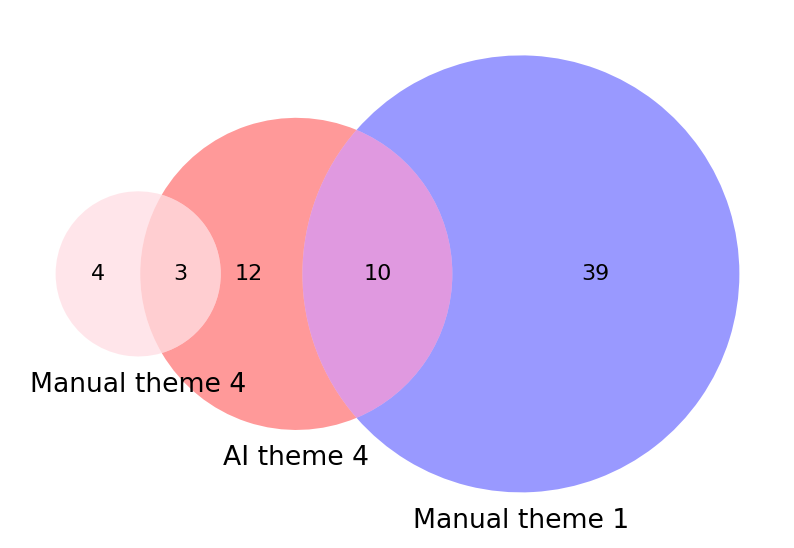

In [ ]:
#plot overlap of clusters
from matplotlib_venn import venn3

# Define the sets
phase1 = set(clustered_words['Theme 1: Social and Emotional Learning '])
phase2 = set(clustered_words['Theme 2: Self Efficacy'])
phase3 = set(clustered_words['Theme 3: Career Readiness'])
phase4 = set(clustered_words['Theme 4: Program Impact'])
set1 = set(clusters_gt[0])
set2 = set(clusters_gt[1])
set3 = set(clusters_gt[2])
set4 = set(clusters_gt[3])
plt.figure(figsize=(10, 7))
#set fontsize as 16
plt.rcParams.update({'font.size': 16})

#set colors of manual theme
colors = {"set1": "green", "set2": "orange", "set3": "blue", 
          "set4": "pink", "phase1": "red", "phase2": "red", "phase3": "red", "phase4": "red"}

# plt.rcParams['font.family'] = 'Times New Roman'

venn3([phase1, set1, set2 ], ('AI theme 1', 'Manual theme 1', 'Manual theme 2'), 
      set_colors=(colors["phase1"], colors["set1"], colors["set2"]))
plt.savefig('theme1.svg', format='svg', dpi=300)

plt.figure(figsize=(10, 10))
venn3([phase2, set2, set3], ('AI theme 2', 'Manual theme 2', 'Manual theme 3'), 
      set_colors=(colors["phase2"], colors["set2"], colors["set3"]))
plt.savefig('theme2.svg', format='svg', dpi=300)

plt.figure(figsize=(10, 10))
venn3([phase3, set3, set4], ('AI theme 3', 'Manual theme 3', 'Manual theme 4'), 
      set_colors=(colors["phase3"], colors["set3"], colors["set4"]))
plt.savefig('theme3.svg', format='svg', dpi=300)

plt.figure(figsize=(10, 10))
venn3([phase4, set4, set3], ('AI theme 4', 'Manual theme 4', 'Manual theme 1'), 
      set_colors=(colors["phase4"], colors["set4"], colors["set3"]))
plt.savefig('theme4.svg', format='svg', dpi=300)
plt.show()


# Issues?

Create an issue on the GitHub page, or send an email to ayushpandey@ucmerced.edu
